# Projeto 3 

## Manuel Castanares & Luis Filipe Carrete



In [76]:
import math
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, probplot
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [45]:
dados = pd.read_csv('IMDB-Movie-Data.csv')

## Análise Exploratória: 

In [46]:
dados[['genero1','genero2','genero3']] = dados.Genre.str.split(",",expand=True,)


In [47]:
dados.genero1.append(dados.genero2).append(dados.genero3).value_counts()
top_genero = ['Drama', 'Action', 'Comedy', 'Adventure', 'Thriller']


In [48]:
dados_drama = dados.loc[(dados.genero1 == "Drama") | (dados.genero2 == "Drama") | (dados.genero3 == "Drama")]

media_drama = dados_drama.Rating.mean()

dados_action = dados.loc[(dados.genero1 == "Action") | (dados.genero2 == "Action") | (dados.genero3 == "Action")]

media_action = dados_action.Rating.mean()

dados_comedy = dados.loc[(dados.genero1 == "Comedy") | (dados.genero2 == "Comedy") | (dados.genero3 == "Comedy")]

media_comedy = dados_comedy.Rating.mean()

dados_adv = dados.loc[(dados.genero1 == "Adventure") | (dados.genero2 == "Adventure") | (dados.genero3 == "Adventure")]

media_adv = dados_adv.Rating.mean()

dados_thri = dados.loc[(dados.genero1 == "Thriller") | (dados.genero2 == "Thriller") | (dados.genero3 == "Thriller")]

media_thri = dados_thri.Rating.mean()

medias=[media_drama, media_action, media_comedy, media_adv, media_thri]


<function matplotlib.pyplot.show(*args, **kw)>

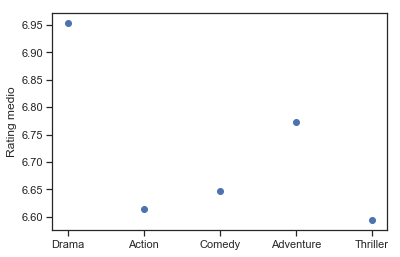

In [49]:
x = np.arange(1,6,1)

plt.plot(x, medias, "o")
plt.ylabel("Rating medio")
plt.xticks(x, top_genero)
plt.show


In [50]:
dados_na = dados.dropna()

Rating

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

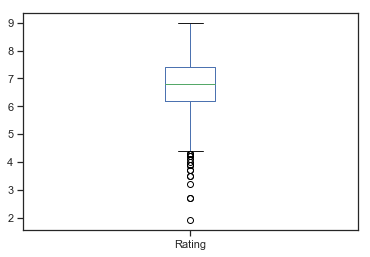

In [51]:
r = dados["Rating"]
r.plot.box()
r.describe()

Média das notas estão acima de 5 e o desvio padrão é de quase 1

Revenue

Text(0, 0.5, 'Revenue')

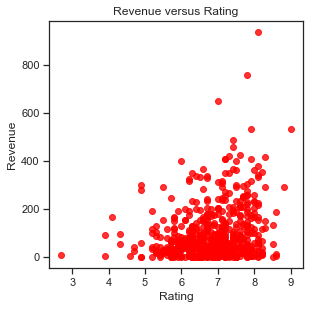

In [52]:
re = dados_na["Rating"]
z = dados_na["Revenue (Millions)"]
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(re, z, c='red', alpha=0.8)
plt.title('Revenue versus Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue')

In [53]:
print("Correlação entre Rating e Revenue:",np.corrcoef(re, z)[0,1])

Correlação entre Rating e Revenue: 0.2256595818070043


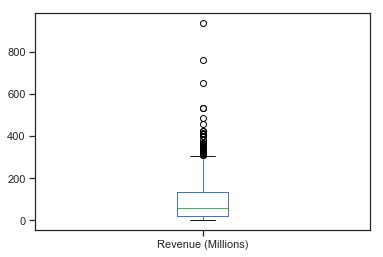

In [54]:
z.plot.box()

Runtime

Text(0, 0.5, 'Runtime')

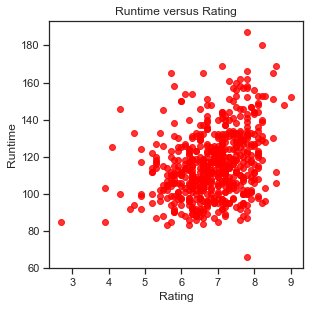

In [55]:
run = dados_na["Runtime (Minutes)"]

fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(re, run, c='red', alpha=0.8)
plt.title('Runtime versus Rating')
plt.xlabel('Rating')
plt.ylabel('Runtime')

In [56]:
print("Correlação entre Rating e Runtime:",np.corrcoef(re, run)[0,1])

Correlação entre Rating e Runtime: 0.3121538367890543


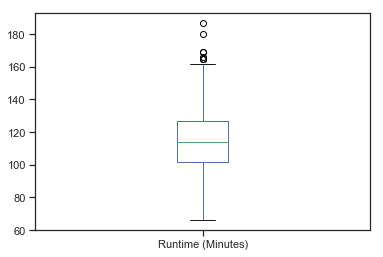

In [57]:
run.plot.box()

Votes

Text(0, 0.5, 'Votes')

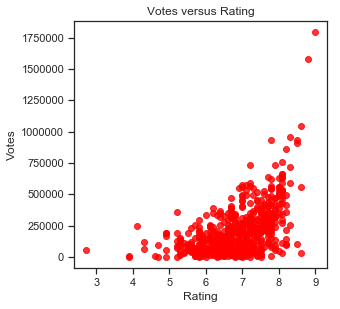

In [58]:
a = dados_na["Votes"]

fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(re, a, c='red', alpha=0.8)
plt.title('Votes versus Rating')
plt.xlabel('Rating')
plt.ylabel('Votes')

In [59]:
print("Correlação entre Rating e Votos:", np.corrcoef(re, a)[0,1])

Correlação entre Rating e Votos: 0.5327789203181783


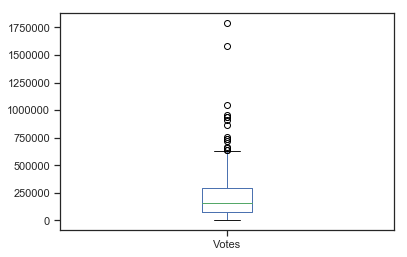

In [60]:
a.plot.box()

In [71]:
dados.columns
x_var = ["Year","Runtime (Minutes)","Rating","Votes","Revenue (Millions)","Metascore"]
y_var = x_var

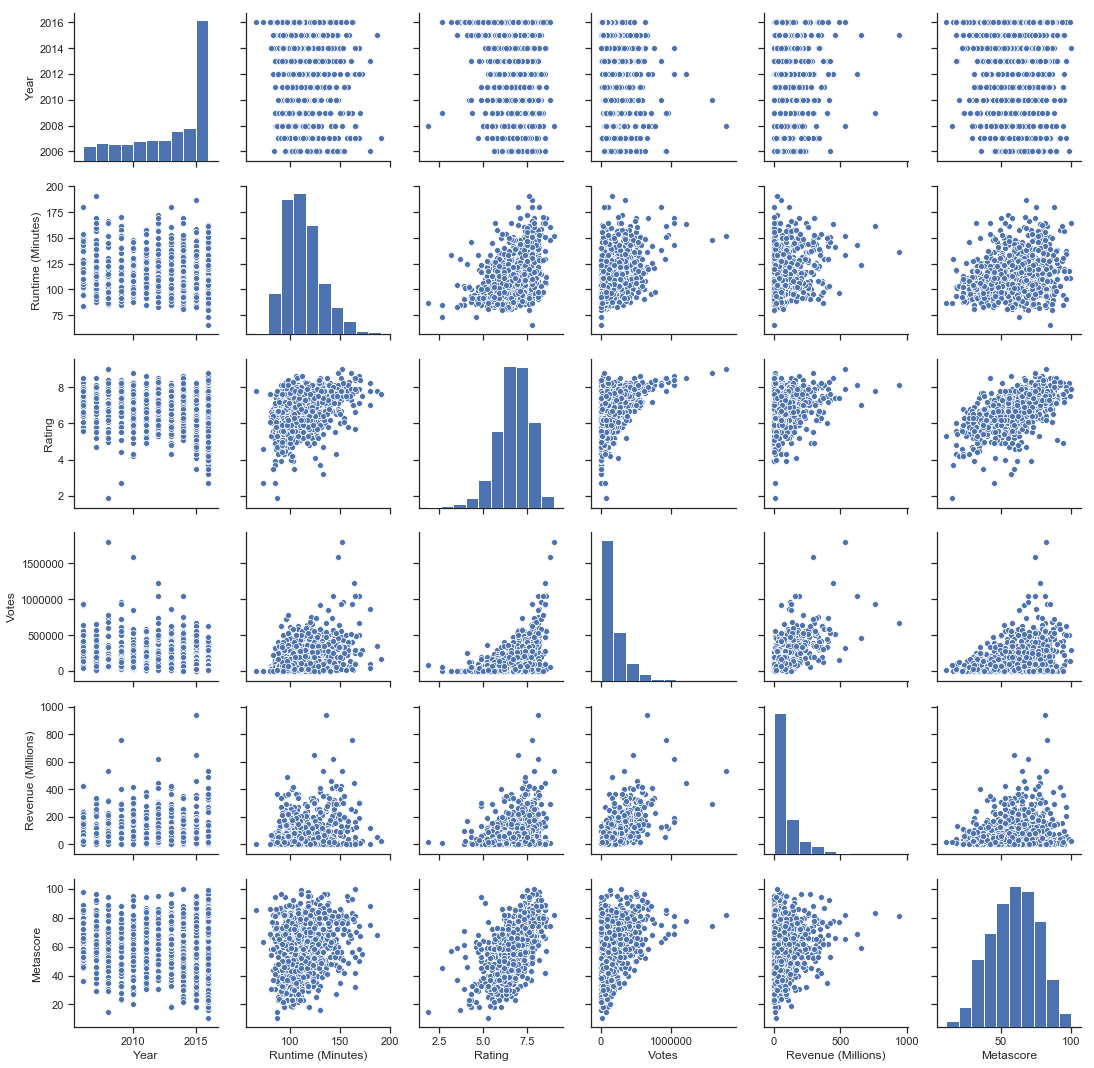

In [72]:
sns.set(style="ticks")

sns.pairplot(dados, x_vars=x_var, y_vars=y_var)

In [74]:
dados_na["votes_log"] = np.log(dados.Votes)
dados["votes_log"] = np.log(dados.Votes) #Ajustando a curva para uma reta

C:\Users\lfcsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


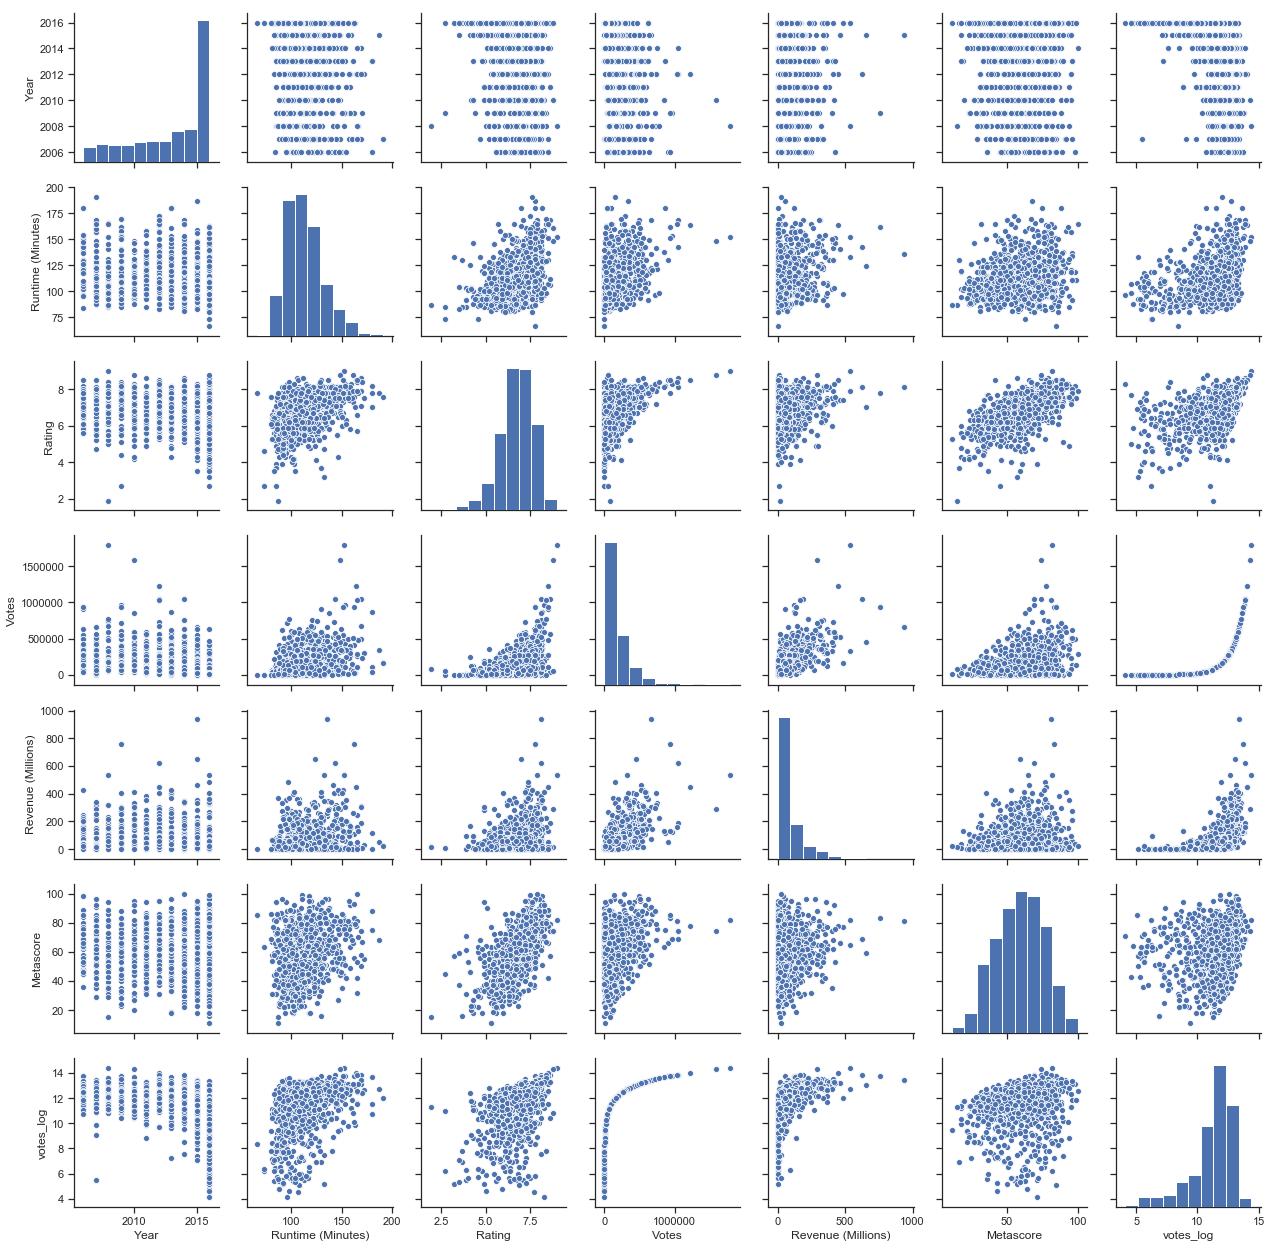

In [75]:
sns.set(style="ticks")

x_vars = ["Year","Runtime (Minutes)","Rating","Votes","Revenue (Millions)","Metascore",'votes_log']
y_vars = x_vars
sns.pairplot(dados, x_vars=x_vars, y_vars=y_vars)

## Separando Treino e Teste:

In [87]:
X = dados_na[["Year","Runtime (Minutes)","Votes","Revenue (Millions)","Metascore",'votes_log']]
y = dados_na["Rating"]
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = RANDOM_SEED)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((435, 6), (145, 6), (435,), (145,))

In [89]:
def regress (X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [90]:
Y = y_train
X = X_train
results = regress(X,Y)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     140.2
Date:                Tue, 19 Nov 2019   Prob (F-statistic):           9.70e-98
Time:                        09:59:09   Log-Likelihood:                -317.24
No. Observations:                 435   AIC:                             648.5
Df Residuals:                     428   BIC:                             677.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -36.5197     17.103     -2.135      0.033     -70.136      -2.903
Year                   0.0196      0.008      2.318      0.021       0.003       0.036
Runtime (Minutes)      0.0038      0.001      2.626      0.009       0.001       0.007
Votes               1.113e-06   2.08e-07      5.356      0.000    7.05e-07    1.52e-06
Revenue (Millions)    -0.0013      0.000     -4.607      0.000      -0.002      -0.001
Metascore              0.0324      0.002     20.158      0.000       0.029       0.036
votes_log              0.1309      0.033      3.968      0.000       0.066       0.196
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.584
Skew:                          -0.535   Prob(JB):                     7.87e-21
Kurtosis:                       4.991   Cond. No.                     2.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""